<a href="https://colab.research.google.com/github/Fcosialls/WCS_Projects/blob/main/PARTIE_2_projet_Climat_WCS_FCosialls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dans quelle mesure l’Homme impacte t il le réchauffement climatique ?

Maintenant que nous avons observé qu'il y avait bel et bien une hausse globale des température, nous souhaiterions avoir si l'homme a un impact sur le rechauffement climatique.


---


### Les informations officielles 

Le cinquième Rapport (**[Rapport du GIEC de 2014](https://www.ipcc.ch/site/assets/uploads/2018/02/SYR_AR5_FINAL_full_fr.pdf)**) d’évaluation a été finalisé entre 2013 et 2014 est on ne peut plus explicite :  
*   Les émissions anthropiques de **gaz à effet de serre**, qui ont augmenté depuis l’époque préindus-trielle en raison essentiellement de la **croissance économique et démographique**, sont actuelle-ment plus élevées que jamais[...]. il est extrêmement probable* qu’ils aient été la cause principale du réchauffement observé depuis le milieu du XXe siècle.
 

Dans le premier volet de ce rapport, le groupe d'experts du GIEC précise « Le cumul des émissions de CO2 détermine dans une large mesure la moyenne mondiale du réchauffement en surface vers la fin du XXIe siècle et au-delà ».


---



### Les données que nous allons étudier

Nous commencerons d'abord par vérifier la corrélation entre la population humaine, les emissions de CO2 ainsique que l'augmentation de la température.

Comme précédément, nous baserons nos observation sur des donénes allant de 1875 à 2015.

###### Imports et CSV
(*ne pas développer*)

In [ ]:
#à installer
!pip install bar_chart_race

     |████████████████████████████████| 163kB 2.8MB/s 


In [ ]:
#Les librairies

import pandas as pd #def and stat
import numpy as np # math

import plotly as py #viz
import plotly.express as px #map viz
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import io # to import local files
from google.colab import files # to import local file
import matplotlib.pyplot as plt #some viz
from itertools import combinations 
from collections import Counter
from sklearn.linear_model import LinearRegression #for regressions
from sklearn.linear_model import LogisticRegression #for regressions
from sklearn.preprocessing import PolynomialFeatures #for regressions

import bar_chart_race as bcr #Bar Char Race

import seaborn as sns #viz and regre

In [ ]:
# Les fichiers CSV

#Temperature
df_temp=pd.read_csv('https://raw.githubusercontent.com/Fcosialls/WCS_Projects/main/Global_warming/DATA_CSV/GlobalTemperatures.csv')
#emissions de CO2
df_co2 = pd.read_csv('https://raw.githubusercontent.com/Fcosialls/WCS_Projects/main/Global_warming/DATA_CSV/annual-co2-emissions-per-country.csv')
#Pour la population
df_pop = pd.read_csv('https://raw.githubusercontent.com/Fcosialls/WCS_Projects/main/Global_warming/DATA_CSV/WorldPopulationAnnual12000years_interpolated_HYDEandUNto2015.csv')

###### Code
(*ne pas développer*)

In [ ]:
# Ici je traite la donnée pour comparer directement température et emission CO2 dans le temps (entre 1750 et 2018)
df_temp['dt'] = pd.to_datetime(df_temp['dt'])
df_temp['Year'] = df_temp['dt'].dt.year
df_temp['YearIndex']=df_temp['Year']
df_temp2=df_temp
df_temp2=df_temp2.set_index('YearIndex')
# Nous travaillerons sur des données de 1875 à 2015
df_temp2=df_temp2.loc['1875':'2015']

# Travail pour les regressions et écarts températures
df_t_1875=df_temp2[df_temp2['Year']>=1875]

df_t_pivot=df_t_1875.pivot_table(values='LandAndOceanAverageTemperature', index='Year', aggfunc='mean')
df_t_pivot=df_t_pivot.reset_index()
df_temp_corr = df_t_pivot
df_temp_corr['YearIndex']=df_temp_corr['Year']
df_temp_corr=df_temp_corr.set_index('YearIndex')

global_mean=df_t_pivot['LandAndOceanAverageTemperature'].mean()
df_t_pivot['GlobalMeanTemp']=global_mean
df_t_pivot['difference_from_average']= df_t_pivot["LandAndOceanAverageTemperature"] - df_t_pivot["GlobalMeanTemp"]


df_pred=df_t_pivot
X = df_pred[['Year']] 
yt = df_pred['LandAndOceanAverageTemperature'] 
Xaxis = df_pred['Year']
mPOLYtemp = np.polyfit(x = Xaxis, y = yt, deg = 2)

# pour les emissions de CO2
df_co2 = pd.read_csv('https://raw.githubusercontent.com/Fcosialls/WCS_Projects/main/Global_warming/DATA_CSV/annual-co2-emissions-per-country.csv')
df_co2A = df_co2
df_co2A['c_year']=df_co2A['Year']
co2_year=df_co2A.pivot_table(values='Annual CO2 emissions', index='Year', aggfunc='sum')
co2_year = co2_year.rename(columns={"Annual CO2 emissions": "Annual_CO2_emissions"})
co2_year=co2_year.loc[1875:2015]
co2_year=co2_year.reset_index()
co2_year['YeatIndex']=co2_year['Year']
co2_year=co2_year.set_index('YeatIndex')
#Pour la population
df_pop = pd.read_csv('https://raw.githubusercontent.com/Fcosialls/WCS_Projects/main/Global_warming/DATA_CSV/WorldPopulationAnnual12000years_interpolated_HYDEandUNto2015.csv')
df_pop2 = df_pop
s = pd.Series(df_pop["year"])
df_pop2 = df_pop2.set_index([s])
df_pop2 = df_pop2.rename(columns={"year": "Year", "World Population (Spline Interpolation until 1950)": "World_Population"})
df_pop2 = df_pop2.loc[1875:]

Temp_CO2_pop = pd.merge(pd.merge(df_temp_corr,
                                   co2_year,
                                   on='Year'),
                          df_pop2,
                          on='Year')

#calcul des regressions
df_reg=Temp_CO2_pop
X = df_reg[['Year']] 
yt = df_reg['LandAndOceanAverageTemperature'] 
yc = df_reg['Annual_CO2_emissions'] 
yp = df_reg['World_Population'] 

#ici les regressions polynomiales 
Xaxis = df_reg['Year']
mPOLYtemp = np.polyfit(x = Xaxis, y = yt, deg = 2)
mPOLYco2 = np.polyfit(x = Xaxis, y = yc, deg = 2)
mPOLYpop = np.polyfit(x = Xaxis, y = yp, deg = 2)

array = np.arange(df_reg['Year'].min(), df_reg['Year'].max())


# Données pour la Bar Chart Race
df_cc = pd.read_csv('https://raw.githubusercontent.com/Fcosialls/WCS_Projects/main/Global_warming/DATA_CSV/annual-co2-emissions-per-country.csv')
df_co2_country = df_cc.pivot_table(columns= 'Entity',  # columns
                       index = 'Year',     # rows
                       values = 'Annual CO2 emissions', # values
                       )  # aggregate function
df_co2_country[["Africa", "Asia (excl. China & India)","United States","China","Europe","India","North America (excl. USA)","Oceania","South America"]].shape
df_co2_prep = df_co2_country[["Africa", "Asia (excl. China & India)","United States","China","Europe","India","North America (excl. USA)","Oceania","South America"]]
df_co2_prep=df_co2_prep.loc[1875:2018]
df_co2_prep.head(1)

Entity,Africa,Asia (excl. China & India),United States,China,Europe,India,North America (excl. USA),Oceania,South America
Year,,,,,,,,,
1875,0.0,1.791696,135.747536,0.0,535.555888,NaN,1.875968,0.828064,0.0


# Notre analyse

## Les correlations

Le tableau de corrélation nous montre des corrélations positives très fortes entre l'évolution de la population, des emissions de CO2 et de la température.

Cela confirme nos intuitions obtenues à la lecture du Rapport du GIEC de 2014.

In [ ]:
Temp_CO2_pop.head(1)

,Year,LandAndOceanAverageTemperature,Annual_CO2_emissions,World_Population
0,1875,14.921917,3083.197376,1.436121e+09


In [ ]:
Temp_CO2_pop.drop(['Year'], axis=1).corr(method ='pearson')

,LandAndOceanAverageTemperature,Annual_CO2_emissions,World_Population
LandAndOceanAverageTemperature,1.000000,0.865950,0.900575
Annual_CO2_emissions,0.865950,1.000000,0.990207
World_Population,0.900575,0.990207,1.000000


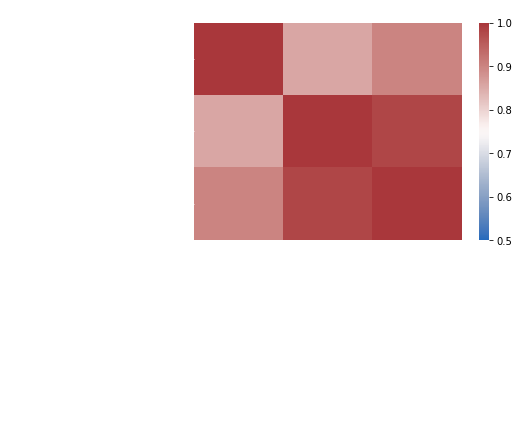

In [ ]:
sns.heatmap(Temp_CO2_pop.drop(['Year'], axis=1).corr(), 
            cmap = "vlag",
            vmin=0.5, vmax=1)
plt.tick_params(colors='white')
plt.title('Correlation Heatmap', color='white')
plt.show()

## Observation de l'évolution de la population, des emissions de CO2 et de la température

Text(0.5, 1.0, 'Evolution de la population entre 1875 et 2015')

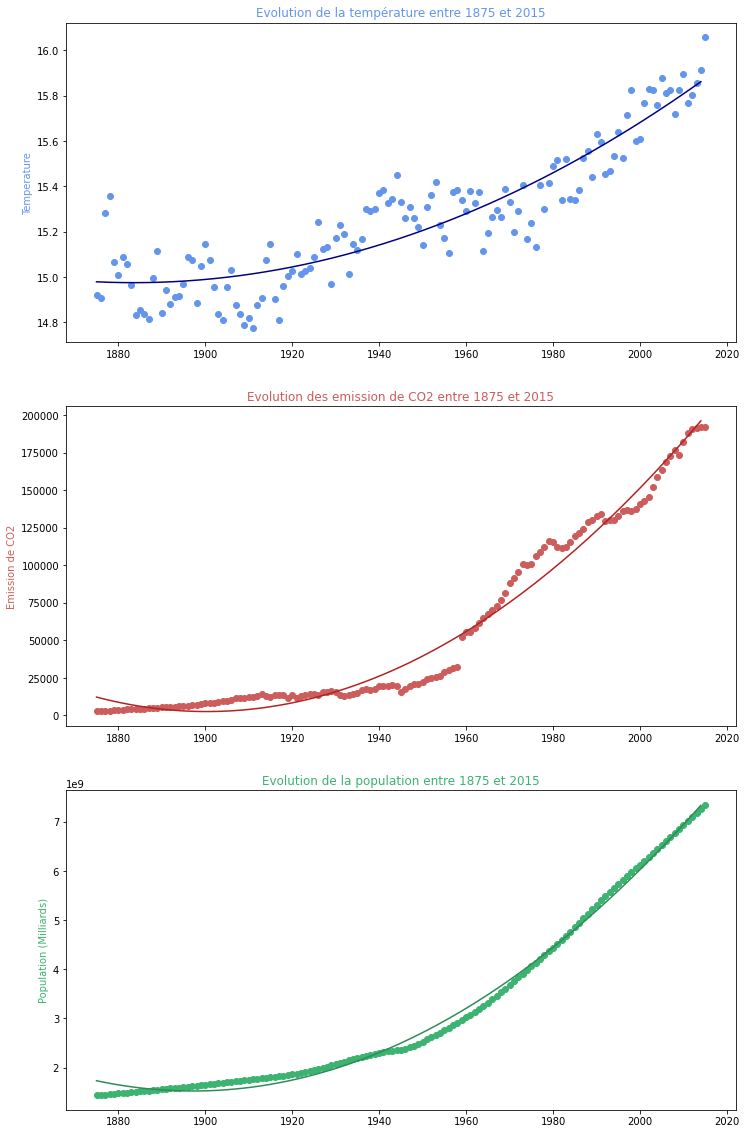

In [ ]:
fig, ax = plt.subplots(figsize = (12,20))

ax1 = plt.subplot(3,1,1)
ax1.scatter(x=df_reg['Year'],y=df_reg['LandAndOceanAverageTemperature'],c='cornflowerblue')
ax1.plot(array,np.poly1d(mPOLYtemp)(array),c='navy')
ax1.set_ylabel('Temperature', color='cornflowerblue')
ax1.set_title('Evolution de la température entre 1875 et 2015', color='cornflowerblue')


ax2 = plt.subplot(3,1,2)
ax2.scatter(x=df_reg['Year'],y=df_reg['Annual_CO2_emissions'],c='indianred')
ax2.plot(array,np.poly1d(mPOLYco2)(array),c='firebrick')
ax2.set_ylabel('Emission de CO2', color='indianred')
ax2.set_title('Evolution des emission de CO2 entre 1875 et 2015', color='indianred')


ax3 = plt.subplot(3,1,3)
ax3.scatter(x=df_reg['Year'],y=df_reg['World_Population'],c='mediumseagreen')
ax3.plot(array,np.poly1d(mPOLYpop)(array),c='seagreen')
ax3.set_ylabel("Population (Milliards)", color='mediumseagreen')
ax3.set_title('Evolution de la population entre 1875 et 2015', color='mediumseagreen')


(1200000000.0, 8000000000.0)

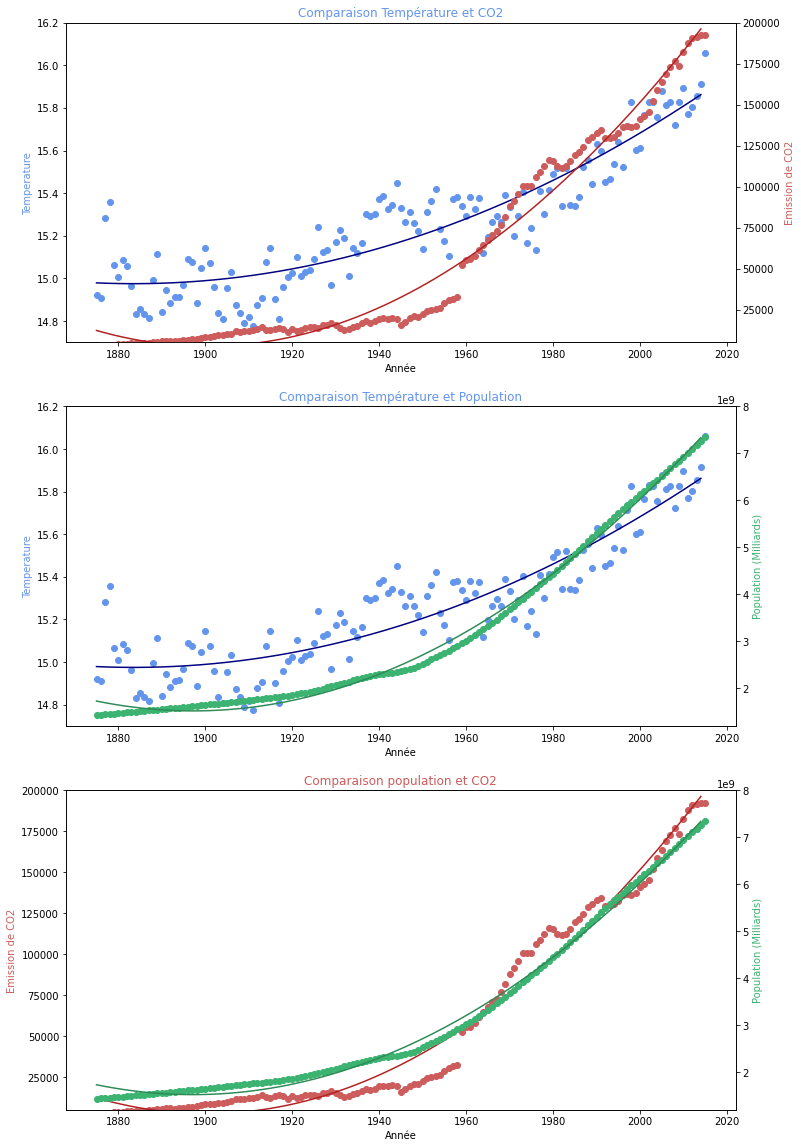

In [ ]:
fig, ax = plt.subplots(figsize = (12,20))
#Temperature et CO2
ax1 = plt.subplot(3,1,1)
ax2=ax1.twinx()
ax1.scatter(x=df_reg['Year'],y=df_reg['LandAndOceanAverageTemperature'],c='cornflowerblue')
ax1.plot(array,np.poly1d(mPOLYtemp)(array),c='navy')
ax1.set_ylabel('Temperature', color='cornflowerblue')
ax2.scatter(x=df_reg['Year'],y=df_reg['Annual_CO2_emissions'],c='indianred')
ax2.plot(array,np.poly1d(mPOLYco2)(array),c='firebrick')
ax2.set_ylabel('Emission de CO2', color='indianred')

ax1.set(xlabel='Année', title = "Comparaison Température et CO2")
ax1.set_title("Comparaison Température et CO2", color='cornflowerblue')
ax1.set_ylim(14.7,16.2)
ax2.set_ylim(5000,200000)

#Temperature et Population
ax3 = plt.subplot(3,1,2)
ax4=ax3.twinx()
ax3.scatter(x=df_reg['Year'],y=df_reg['LandAndOceanAverageTemperature'],c='cornflowerblue')
ax3.plot(array,np.poly1d(mPOLYtemp)(array),c='navy')
ax3.set_ylabel('Temperature', color='cornflowerblue')
ax4.scatter(x=df_reg['Year'],y=df_reg['World_Population'],c='mediumseagreen')
ax4.plot(array,np.poly1d(mPOLYpop)(array),c='seagreen')
ax4.set_ylabel("Population (Milliards)", color='mediumseagreen')

ax3.set(xlabel='Année', title = "Comparaison Température et Population")
ax3.set_title("Comparaison Température et Population", color='cornflowerblue')
ax3.set_ylim(14.7,16.2)
ax4.set_ylim(1200000000,8000000000)

#CO2 et Population
ax5 = plt.subplot(3,1,3)
ax6=ax5.twinx()
ax5.scatter(x=df_reg['Year'],y=df_reg['Annual_CO2_emissions'],c='indianred')
ax5.plot(array,np.poly1d(mPOLYco2)(array),c='firebrick')
ax5.set_ylabel('Emission de CO2', color='indianred')
ax6.scatter(x=df_reg['Year'],y=df_reg['World_Population'],c='mediumseagreen')
ax6.plot(array,np.poly1d(mPOLYpop)(array),c='seagreen')
ax6.set_ylabel("Population (Milliards)", color='mediumseagreen')
ax5.set(xlabel='Année', title = "Comparaison population et CO2")
ax5.set_title("Comparaison population et CO2", color='indianred')
ax5.set_ylim(5000,200000)
ax6.set_ylim(1200000000,8000000000)

In [ ]:
df_co2_prep

Entity,Africa,Asia (excl. China & India),United States,China,Europe,India,North America (excl. USA),Oceania,South America
Year,,,,,,,,,
1875,0.000000,1.791696,135.747536,0.000000,535.555888,NaN,1.875968,0.828064,0.000000
1876,0.000000,1.678112,132.820000,0.000000,548.266304,NaN,1.857648,0.930656,0.000000
1877,0.000000,1.736736,147.175552,0.000000,547.097488,NaN,2.022528,1.066224,0.000000
1878,0.000000,2.183744,143.903600,0.000000,553.267664,1.952912,1.934592,1.322704,0.000000
1879,0.000000,2.440224,175.468960,0.000000,571.129664,1.853984,2.183744,1.960240,0.000000
...,...,...,...,...,...,...,...,...,...
2014,1365.297815,6683.825281,5572.106312,9820.360492,5595.415942,2199.400041,1236.775628,443.144043,1198.303984
2015,1330.236714,6845.313527,5422.965677,9716.467840,5600.982152,2298.170090,1239.216877,454.618667,1170.890808
2016,1354.960916,7013.986845,5306.662457,9704.479432,5595.406732,2371.752346,1228.642428,464.197374,1134.384999


In [ ]:
bcr.bar_chart_race(df_co2_prep, period_fmt='year {x:,.0f}', title='Emissions de CO2 par pays de 1875 à 2018', perpendicular_bar_func='median')

# Nos Insights

### L'impact de l'humanité sur le réchauffement climatique


*   Une très forte corrélation existe entre la température, la population et les emissions de CO2 :
    *   Coefficient de corrélation positif de 0.86 entre température et emission de CO2
    *   Coefficient de corrélation positif de 0.90 entre température et population 
*   Cette corrélation est d'autant plus flagrante lorsque l'on compare les graphiques et leurs régressions, entre eux.
*   Notre "Bar Chart Race", montrant les émissions de CO2 par pays de 1875 à 2018, nous apprend que :
    *    Les pays ayant émis le plus de CO2 sur une longue période sont les USA et l'Europe ! Ce n'est que depuis une vingtaine d'année que l'Asie a rattrapé les pays occidentaux en termes d'émissions de CO2...

### Limites
*   Nous avons choisi d'utiliser une regression polynomiale pour illustrer les différentes tendances, il existe bien évidement d'autres méthodes.
*   Par ailleurs, il aurait été intéressant de prendre en compte l'impact de la croissance économique sur le réchauffement climatique.

---




# Rendez-vous en [PARTIE 3](https://)

---

Répertoire
*   [Partie 1](https://colab.research.google.com/drive/1lWd2nNk3DpGSuCtwOM9gOhClOxLz9ZAo#scrollTo=Lj_YPGFNlMnA)
*   Partie 2 <-- Vous êtes ici
*   [Partie 3](https://colab.research.google.com/drive/1hAu0w8wHIazqixfPUNji61hdOdWM0me5#scrollTo=7q3br1u19wMM&uniqifier=1)
*   [Partie 4](https://colab.research.google.com/drive/1lyf1CgqDEQA8g6tnaYZ_Li7u0wHsJUvn#scrollTo=F_NH1M2frCj8)